In [3]:
import pandas as pd
results = pd.read_csv('results.csv',index_col="name")
import matplotlib.pyplot as plt

                                total     acc acc_rate
name                                                  
mbpp__codellama-instruct        427.0   237.0   55.50%
humaneval__codellama-instruct   164.0    41.0   25.00%
mbpp__codellama-python          427.0   228.0   53.40%
humaneval__codellama-python     164.0    52.0   31.71%
mathqa__codellama-python       1883.0   145.0    7.70%
mbpp__opencoder1.5              427.0   286.0   66.98%
humaneval__opencoder1.5         164.0   117.0   71.34%
mathqa__opencoder1.5           1883.0   169.0    8.98%
mbpp__opencoder8                427.0   329.0   77.05%
humaneval__opencoder8           164.0   136.0   82.93%
mathqa__opencoder8             1883.0   333.0   17.68%
mbpp__qwen1.5                   427.0   254.0   59.48%
humaneval__qwen1.5              164.0    79.0   48.17%
mathqa__qwen1.5                1883.0   174.0    9.24%
mbpp__qwen7                     427.0   324.0   75.88%
humaneval__qwen7                164.0   131.0   79.88%
mathqa__qw

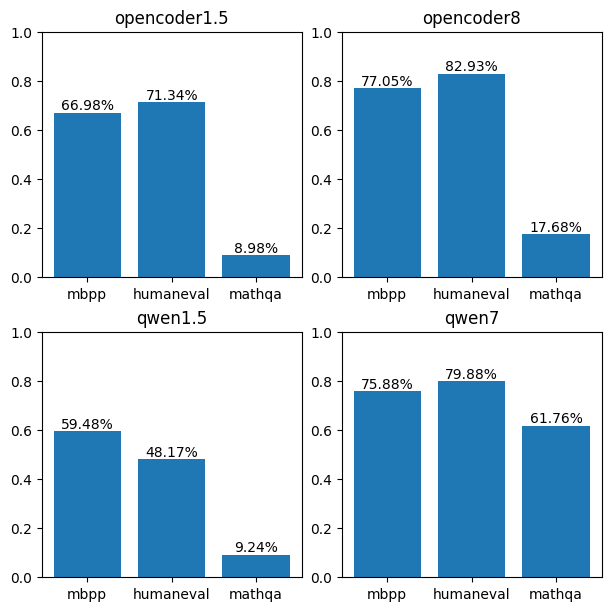

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6), constrained_layout=True)
for i, model in enumerate(['opencoder1.5','opencoder8','qwen1.5','qwen7']):
    def float_percent(f):
        f = f[:-1]
        f = float(f)
        return f/100
    plt.subplot(2,2,i+1)
    ax[i//2][i%2].set_title(model)
    ax[i//2][i%2].set_ylim(0,1)
    mbpp_acc = float_percent(results['acc_rate'][f"mbpp__{model}"])
    humaneval_acc = float_percent(results['acc_rate'][f"humaneval__{model}"])
    mathqa_acc = float_percent(results['acc_rate'][f"mathqa__{model}"])
    bars = plt.bar(["mbpp",'humaneval','mathqa'],[mbpp_acc,humaneval_acc,mathqa_acc])
    for bar in bars:
        height = bar.get_height()  # 获取柱子的高度
        ax[i//2][i%2].text(
            bar.get_x() + bar.get_width() / 2,  # 柱子中心的 x 坐标
            height,  # 柱子顶部的 y 坐标
            f'{height:.2%}',  # 显示的数值
            ha='center',  # 水平对齐方式（居中）
            va='bottom',  # 垂直对齐方式（底部）
            fontsize=10,  # 字体大小
        )
plt.show()